<a href="https://colab.research.google.com/github/jadercaro/Prediccion-de-desercion-universitaria/blob/main/G_DB_6_JaderCaro_JaglerVelasquez_AlejandroArias_desercion_clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicción de deserción y éxito en estudiantes universitarios**
El conjunto de datos fue creado a partir de una institución de educación superior (adquirida de varias bases de datos disjuntas) relacionada con estudiantes matriculados en diferentes carreras de pregrado, como agronomía, diseño, educación, enfermería, periodismo, administración, servicio social y tecnologías. El conjunto de datos incluye información conocida en el momento de la matrícula de los estudiantes (trayectoria académica, datos demográficos y factores socioeconómicos) y el rendimiento académico de los estudiantes al final del primer y segundo semestre. Los datos se utilizan para construir modelos de clasificación para predecir la deserción y el éxito académico de los estudiantes. El problema se formula como una tarea de clasificación de tres categorías, en la que hay un fuerte desequilibrio hacia una de las clases.

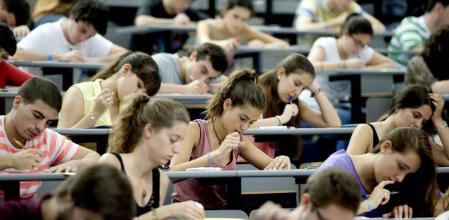
---

## **Descripción de las variables del conjunto de datos:**

| Variable                                   | Descripción                                                                                                 |
|--------------------------------------------|-------------------------------------------------------------------------------------------------------------|
| Marital Status                             | Estado civil del estudiante.                                                                                |
| Application mode                           | Modalidad de ingreso a un programa educativo.                                                                |
| Application order                          | Orden de solicitud (0 - primera opción; 9 - última opción).                                                  |
| Course                                     | Programas educativos en los que están matriculados los estudiantes.                                          |
| Daytime/evening attendance                | Tipo de asistencia: Diurna o Nocturna.                                                                      |
| Previous qualification                     | Tipo de educación anterior obtenida por los estudiantes.                                                      |
| Previous qualification (grade)            | Nota de calificación anterior (entre 0 y 200).                                                               |
| Nationality                                | Nacionalidad del estudiante.                                                                                |
| Mother's qualification                    | Calificación de la madre.                                                                                   |
| Father's qualification                    | Calificación del padre.                                                                                     |
| Mother's occupation                        | Profesión de la madre.                                                                                      |
| Father's occupation                        | Profesión del padre.                                                                                        |
| Admission grade                            | Nota de admisión (entre 0 y 200).                                                                           |
| Displaced                                  | Desplazados (1 - sí; 0 - no).                                                                               |
| Educational special needs                 | Necesidades educativas especiales (1 - sí; 0 - no).                                                          |
| Debtor                                     | Deudor (1 - sí; 0 - no).                                                                                    |
| Tuition fees up to date                    | Matrículas al día (1 - sí; 0 - no).                                                                         |
| Gender                                     | Género (1 - masculino; 0 - femenino).                                                                       |
| Scholarship holder                         | Tiene beca (1 - sí; 0 - no).                                                                                |
| Age at enrollment                          | Edad del estudiante al momento de la inscripción.                                                            |
| International                              | Internacional (1 - sí; 0 - no).                                                                             |
| Curricular units 1st sem (credited)        | Número de unidades curriculares acreditadas en el 1er semestre.                                               |
| Curricular units 1st sem (enrolled)       | Número de unidades curriculares matriculadas en el 1er semestre.                                              |
| Curricular units 1st sem (evaluations)    | Número de evaluaciones a unidades curriculares en el 1er semestre.                                            |
| Curricular units 1st sem (approved)       | Número de unidades curriculares aprobadas en el 1er semestre.                                                 |
| Curricular units 1st sem (grade)          | Promedio de calificaciones en el 1er semestre (entre 0 y 20).                                                  |
| Curricular units 1st sem (without evaluations) | Número de unidades curriculares sin evaluaciones en el 1er semestre.                                       |
| Curricular units 2nd sem (credited)       | Número de unidades curriculares acreditadas en el 2do semestre.                                               |
| Curricular units 2nd sem (enrolled)       | Número de unidades curriculares matriculadas en el 2do semestre.                                              |
| Curricular units 2nd sem (evaluations)    | Número de evaluaciones a unidades curriculares en el 2do semestre.                                            |
| Curricular units 2nd sem (approved)       | Número de unidades curriculares aprobadas en el 2do semestre.                                                 |
| Curricular units 2nd sem (grade)          | Promedio de calificaciones en el 2do semestre (entre 0 y 20).                                                  |
| Curricular units 2nd sem (without evaluations) | Número de unidades curriculares sin evaluaciones en el 2do semestre.                                       |
| Unemployment rate                         | Tasa de desempleo (%).                                                                                      |
| Inflation rate                            | Tasa de inflación (%).                                                                                      |
| GDP                                       | Producto Interno Bruto (GDP).                                                                              |
| Target                                    | Objetivo: El problema se formula como una tarea de clasificación de tres categorías (abandono, matriculado y egresado) al final de la duración normal del curso. |


In [ ]:
!pip install dython

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
from dython.nominal import associations
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')
!git clone https://github.com/javel3232/Predict-students-dropout-and-academic-success.git
os.chdir('/content/Predict-students-dropout-and-academic-success/Data')


fatal: destination path 'Predict-students-dropout-and-academic-success' already exists and is not an empty directory.


In [26]:
datos = pd.read_csv("data.csv" , sep=";")
datos.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


----
# **Verificación de valores faltantes en el conjunto de datos**

In [ ]:
display(pd.DataFrame(datos.isnull().sum(), columns=['Valores faltantes']))

,Valores faltantes
Marital status,0
Application mode,0
Application order,0
Course,0
Daytime/evening attendance\t,0
Previous qualification,0
Previous qualification (grade),0
Nacionality,0
Mother's qualification,0
Father's qualification,0


 ## **Análisis de datos faltantes**

Parece que no hay valores faltantes en ninguno de los campos del conjunto de datos. Esto es positivo, ya que no hay necesidad de realizar imputaciones o manejar datos faltantes, lo que simplifica el análisis.

Al no haber valores faltantes, podemos estar seguros de que cada variable tiene una observación válida para cada entrada en el conjunto de datos. Esto es fundamental para garantizar la integridad y la precisión para el análisis del modelo que vamos a contruir.

In [ ]:
datos.info()
display(datos.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [ ]:
datos['Inflation rate'].value_counts()

 1.4    893
 2.6    571
-0.8    533
 0.5    445
 3.7    419
 0.6    414
 2.8    397
-0.3    390
 0.3    362
Name: Inflation rate, dtype: int64

## Valores únicos

In [ ]:
for columna in datos.columns:
    print(f"Valores únicos en {columna}: {datos[columna].nunique()}")

Valores únicos en Marital status: 6
Valores únicos en Application mode: 18
Valores únicos en Application order: 8
Valores únicos en Course: 17
Valores únicos en Daytime/evening attendance	: 2
Valores únicos en Previous qualification: 17
Valores únicos en Previous qualification (grade): 101
Valores únicos en Nacionality: 21
Valores únicos en Mother's qualification: 29
Valores únicos en Father's qualification: 34
Valores únicos en Mother's occupation: 32
Valores únicos en Father's occupation: 46
Valores únicos en Admission grade: 620
Valores únicos en Displaced: 2
Valores únicos en Educational special needs: 2
Valores únicos en Debtor: 2
Valores únicos en Tuition fees up to date: 2
Valores únicos en Gender: 2
Valores únicos en Scholarship holder: 2
Valores únicos en Age at enrollment: 46
Valores únicos en International: 2
Valores únicos en Curricular units 1st sem (credited): 21
Valores únicos en Curricular units 1st sem (enrolled): 23
Valores únicos en Curricular units 1st sem (evaluati

# Análisis exploratorio


## Variable Estado civil

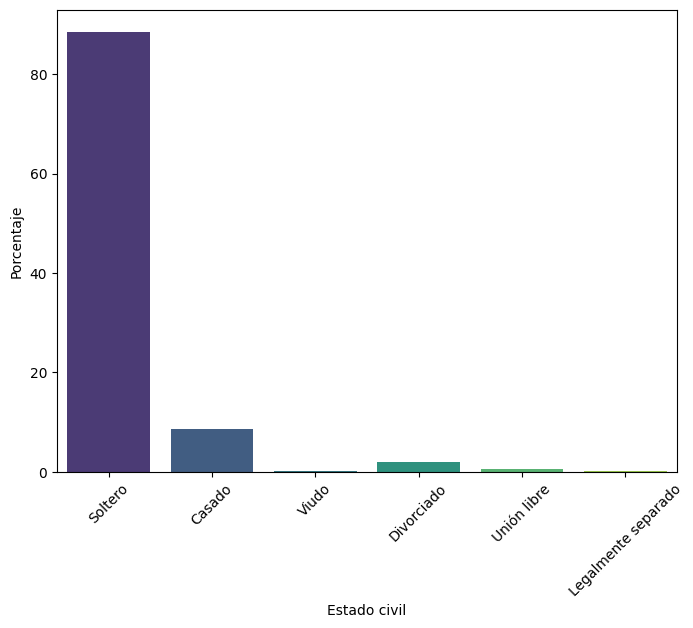

In [ ]:
plt.figure(figsize=(8,6))

sns.countplot(data=datos, x='Marital status', stat='percent', palette='viridis')
plt.xticks(ticks=[0,1,2,3,4,5], labels=['Soltero','Casado', 'Viudo','Divorciado','Unión libre','Legalmente separado'], rotation=45)
plt.xlabel('Estado civil')
plt.ylabel('Porcentaje')
plt.show()

La variable estado civil tiene una categoría que predomina sobre las demás, es la categoría Soltero con más del 80% de datos pertenecientes a esta, luego le sigue Casado con aproximadamente el 10%, las demás categorías se encuentras por debajo del 3% cada una respectivamente

## Variable modo aplicación

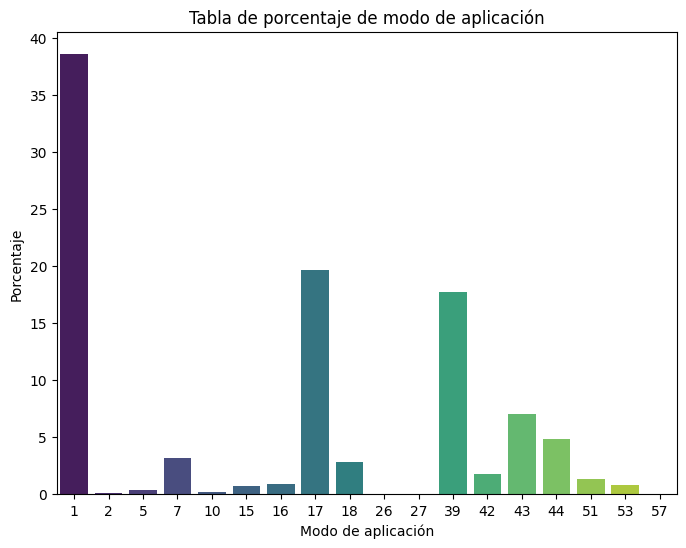

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=datos, x='Application mode', stat='percent', palette='viridis')
plt.xlabel('Modo de aplicación')
plt.ylabel('Porcentaje')
plt.title('Tabla de porcentaje de modo de aplicación')
plt.show()

La variable modo de aplicación tiene una categoría que predomina entre las demás, es la categoría 1 que representa primera fase - contingente general con el 38% aproximadamente, luego le siguen dos categorías, la tercera fase - contigente general con el 20% aproximadamente y luego la categoría mayores de 23 años con 18% aproximadamente, luego las 13 categorías restantes, estan por debajo del 8% cada una

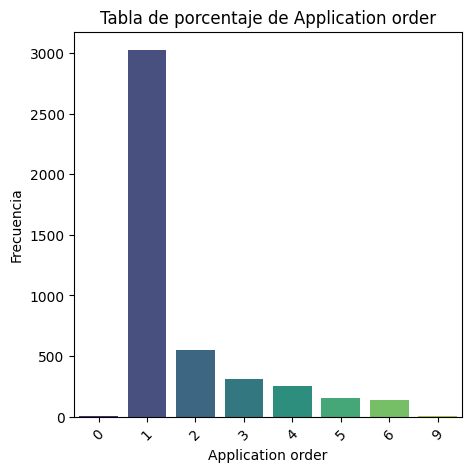

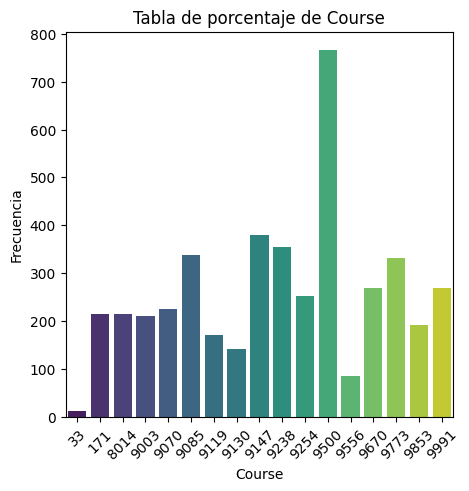

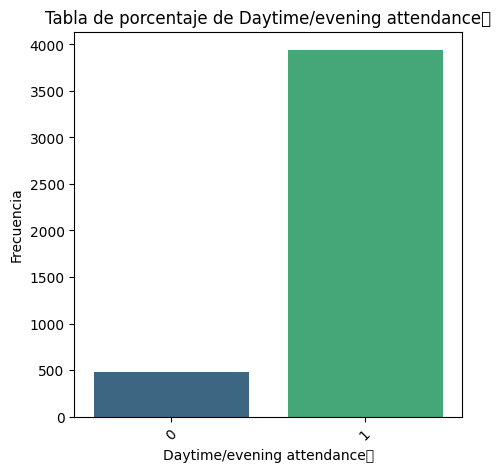

In [ ]:
def graficar_barras(col):
  plt.figure(figsize=(5,5))
  sns.countplot(data=datos, x=col, palette='viridis')
  plt.xlabel(f'{col}')
  plt.xticks(rotation=45)
  plt.ylabel('Frecuencia')
  plt.title(f'Tabla de porcentaje de {col}')
  plt.show()

cols = ['Application order', 'Course', 'Daytime/evening attendance\t']

for col in cols:
  graficar_barras(col)

### Variable orden de aplicación
1. Opción más preferida (primer lugar): Esta opción, identificada como "1", ha sido seleccionada 3026 veces. Es la opción que la mayoría de las personas prefieren en primer lugar.

2. Opción de preferencia en el noveno lugar: Las opciones identificadas como "9" y "0" han sido seleccionadas 1 vez cada una, lo que indica que solo una persona las eligió como su novena y última preferencia.


### Variable Curso

  1. Programas más populares: Los programas más populares parecen ser "Enfermería" (9500), "Gestión" (9147), "Gestión (turno nocturno)" (9991), y "Agronomía" (9003). Estos programas tienen el mayor número de estudiantes matriculados.

  2. Menos populares: Los programas menos populares parecen ser "Higiene Bucal" (9556) y "Tecnologías de Producción de Biocombustibles" (33), con solo 86 y 12 estudiantes matriculados respectivamente.

  3. Interés en servicios sociales: Programas relacionados con servicios sociales como "Servicio Social" (8014), "Servicio Social (turno nocturno)" (9254), y "Servicio Social" (9238) también parecen tener una cantidad considerable de matriculados, aunque no tan alta como algunos de los programas más populares.

  4. Diferencia entre programas diurnos y nocturnos: Es interesante notar que algunos programas, como "Gestión" y "Servicio Social", tienen tanto versiones diurnas como nocturnas. La versión diurna de "Gestión" parece ser más popular que la nocturna, mientras que para "Servicio Social", la versión nocturna tiene más matriculados.

  5. Baja matriculación en ciertos programas: Algunos programas, como "Equinocultura" (9130) y "Tecnologías de Producción de Biocombustibles" (33), tienen una matriculación muy baja en comparación con otros. Esto podría indicar una falta de interés en esos temas específicos o una demanda limitada en el mercado laboral.

### Variable Asistencia diurna/nocturna

1. Asistencia diurna (1): Esta opción ha sido elegida 3941 veces. Indica que la mayoría de las personas prefieren asistir durante el día.

2. Asistencia nocturna (0): Esta opción ha sido elegida 483 veces. Muestra que un número considerablemente menor de personas prefiere asistir durante la noche.

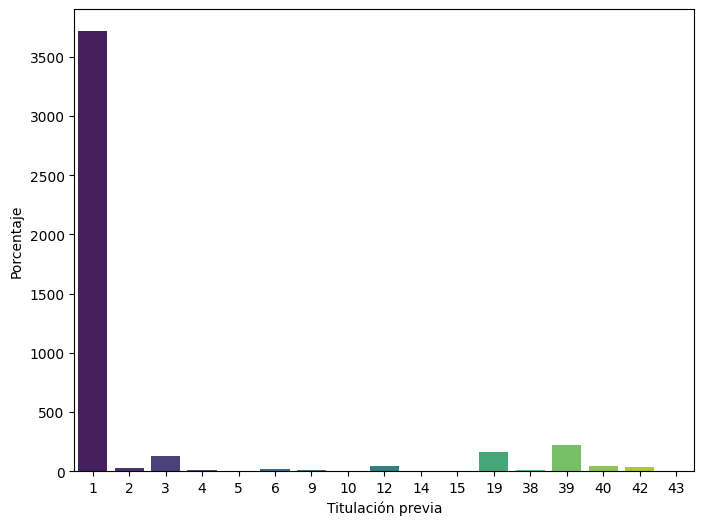

In [ ]:
plt.figure(figsize=(8,6))

sns.countplot(data=datos, x='Previous qualification', palette='viridis')
plt.xlabel('Titulación previa')
plt.ylabel('Porcentaje')
plt.show()

### Variable Titulacion Previa

**1.**La mayoría de las personas en la muestra tienen educación secundaria completa, con un total de 3717 individuos en esta categoría.

**2.**También hay un número pequeño de personas que no han completado ciertos niveles educativos, como el 11º año de escolaridad (12), el 10º año de escolaridad (14) y el 11º año de escolaridad no completado (15).

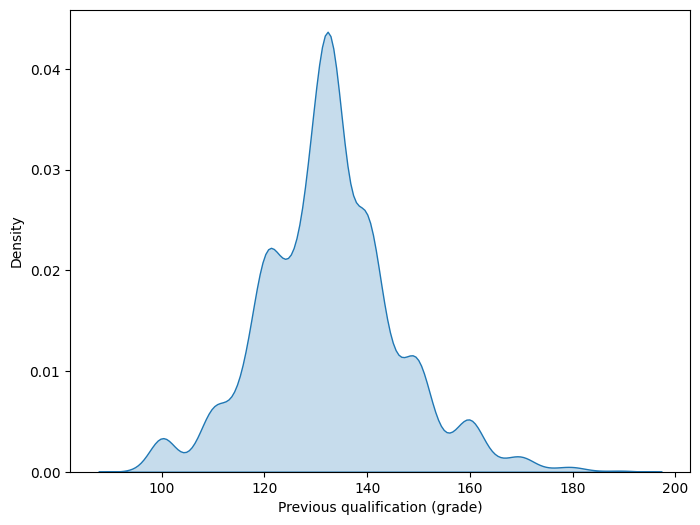

In [ ]:
plt.figure(figsize=(8,6))
sns.kdeplot(datos['Previous qualification (grade)'], fill=True)
plt.show()

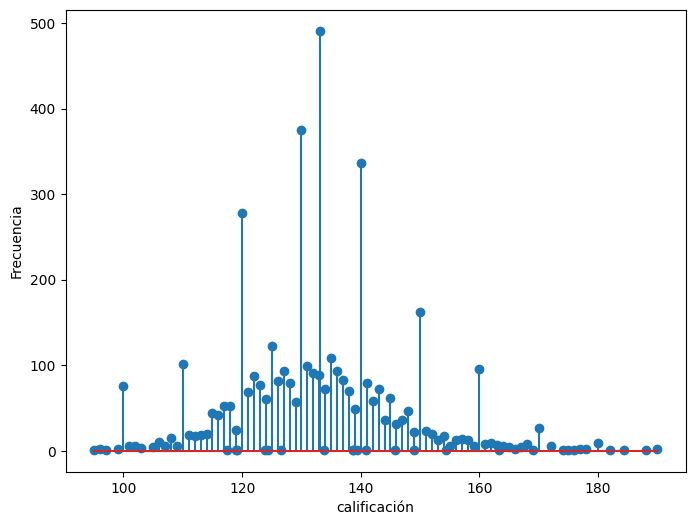

In [ ]:
plt.figure(figsize=(8,6))
plt.stem(datos['Previous qualification (grade)'].value_counts().index, datos['Previous qualification (grade)'].value_counts().values)
plt.xlabel('calificación')
plt.ylabel('Frecuencia')
plt.show()

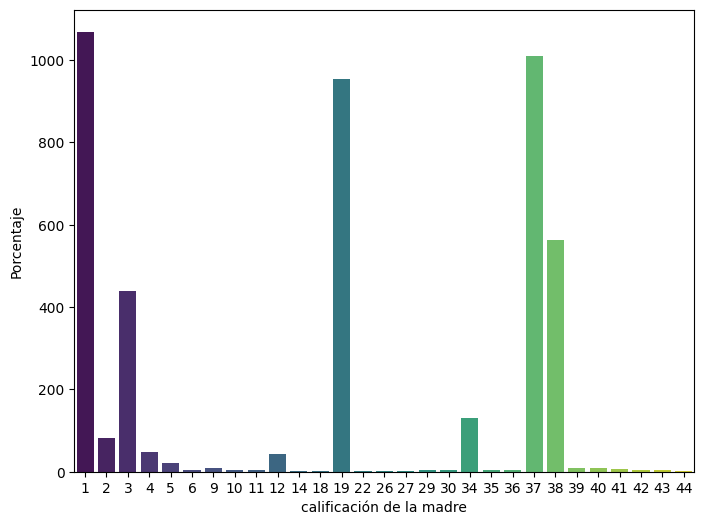

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=datos, x='''Mother's qualification''',  palette='viridis')
plt.xlabel('calificación de la madre')
plt.ylabel('Porcentaje')
plt.show()

### Variable calificacion de la Madre

1.La mayoría de las madres en la muestra tienen educación del tercer ciclo de la educación básica (9º/10º/11º año) o equivalente, con 953 individuos en esta categoría.

2.El siguiente nivel más común es la educación secundaria completa (12º año de escolaridad o equivalente), con 1069 individuos.

3.También hay una cantidad significativa de datos clasificados como "Desconocido" (34), lo que indica una falta de información sobre el nivel educativo de algunas madres en la muestra.


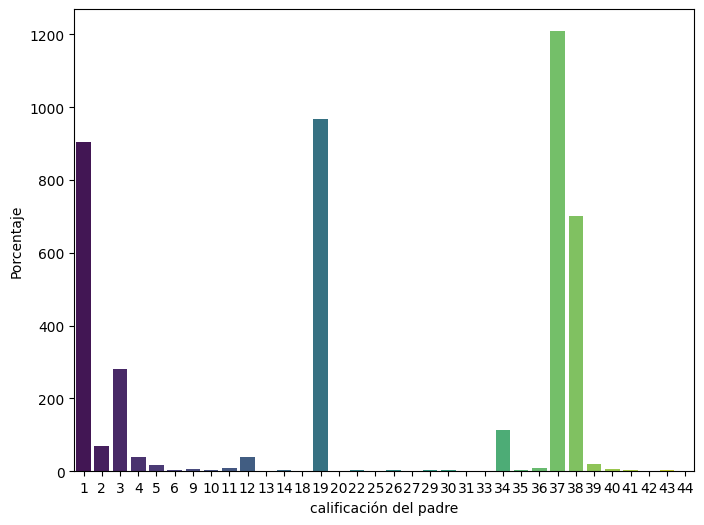

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=datos, x='''Father's qualification''',  palette='viridis')
plt.xlabel('calificación del padre')
plt.ylabel('Porcentaje')
plt.show()

###Variable Calificación del Padre

La mayoría de los padres en la muestra tienen educación del primer ciclo de la educación básica (4º/5º año) o equivalente, con 1209 individuos en esta categoría.
El siguiente nivel más común es la educación del tercer ciclo de la educación básica (9º/10º/11º año) o equivalente, con 968 individuos.
parece que la mayoría de los padres en la muestra tienen al menos educación básica completa, pero el número disminuye a medida que aumenta el nivel educativo, especialmente en los niveles de educación superior y postgrado.

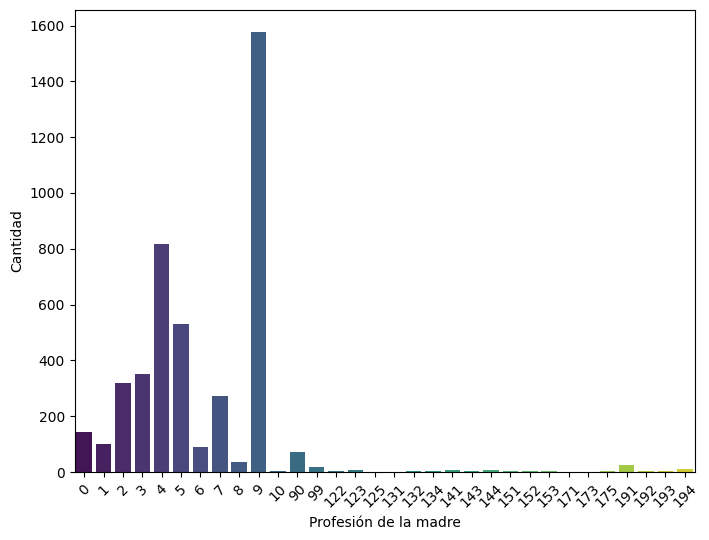

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=datos, x='''Mother's occupation''',  palette='viridis')
plt.xlabel('Profesión de la madre')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

### Variable Profesion de la madre

La categoría ocupacional más común entre las madres en la muestra es la de "Trabajadores no calificados", con 1577 individuos en esta categoría.
Otras ocupaciones comunes entre las madres son "Personal Administrativo" (817 individuos) y "Trabajadores de Servicios Personales, Seguridad y Vendedores" (530 individuos)

Las madres en la muestra tienen una variedad de ocupaciones, con una proporción considerable dedicada a trabajos no calificados, administrativos y de servicios personales, seguridad y ventas. Sin embargo, también hay una presencia significativa en ocupaciones técnicas y profesionales, así como en roles directivos y de representación en el gobierno y otras áreas.

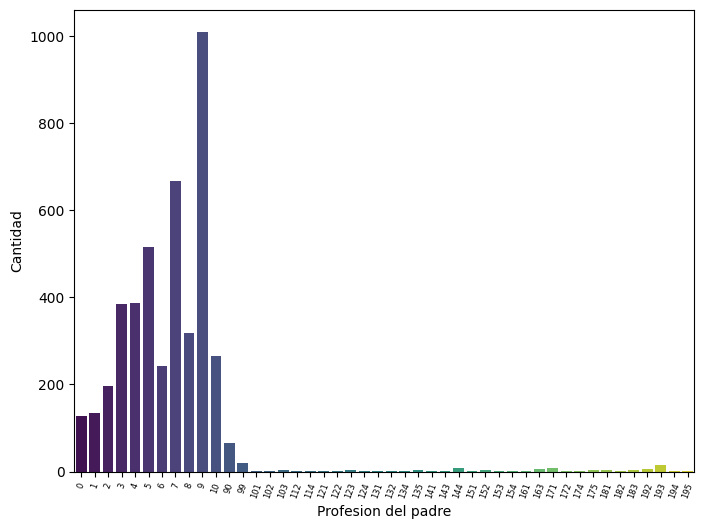

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=datos, x='''Father's occupation''',  palette='viridis', )
plt.xticks(fontsize=6)
plt.xlabel('Profesion del padre')
plt.ylabel('Cantidad')
plt.xticks(rotation=70)
plt.show()

### Variable Profesion del padre

Los padres en la muestra tienen una variedad de ocupaciones, con una proporción considerable dedicada a trabajos no calificados, así como una presencia significativa en ocupaciones técnicas, administrativas y de servicios personales. También hay una diversidad de otras ocupaciones, que van desde agricultores hasta profesionales de la salud y las fuerzas armadas.

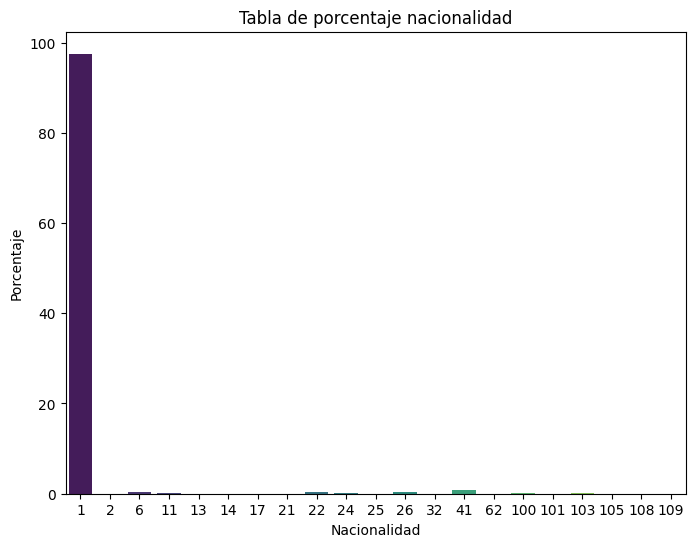

In [ ]:
#7
plt.figure(figsize=(8,6))
sns.countplot(data=datos, x='Nacionality', stat='percent', palette='viridis')
plt.xlabel('Nacionalidad')
plt.ylabel('Porcentaje')
plt.title('Tabla de porcentaje nacionalidad')
plt.show()

La gran mayoría de los datos (aproximadamente el 97.51%) corresponden a una sola nacionalidad, lo que indica que el conjunto de datos está altamente sesgado hacia una nacionalidad específica.

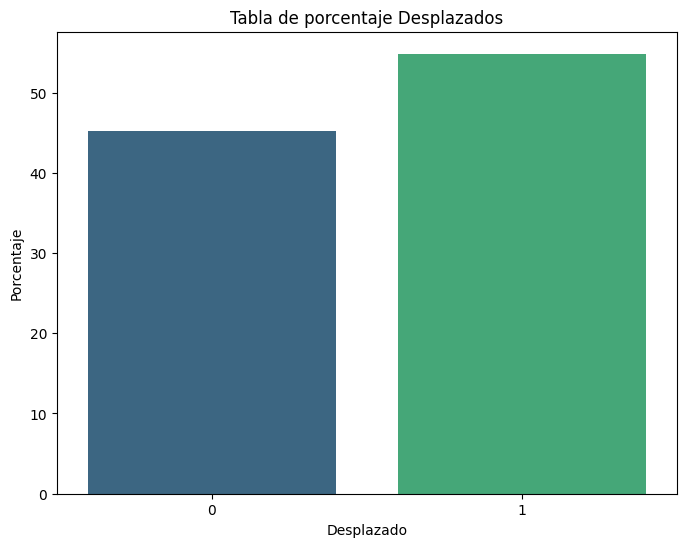

In [ ]:
#13
plt.figure(figsize=(8,6))
sns.countplot(data=datos, x='Displaced', stat='percent', palette='viridis')
plt.xlabel('Desplazado')
plt.ylabel('Porcentaje')
plt.title('Tabla de porcentaje Desplazados')
plt.show()

Aproximadamente el 55% de los registros en el conjunto de datos están etiquetados como "Desplazados", lo que sugiere que el desplazamiento es un factor relevante en una proporción significativa de los casos

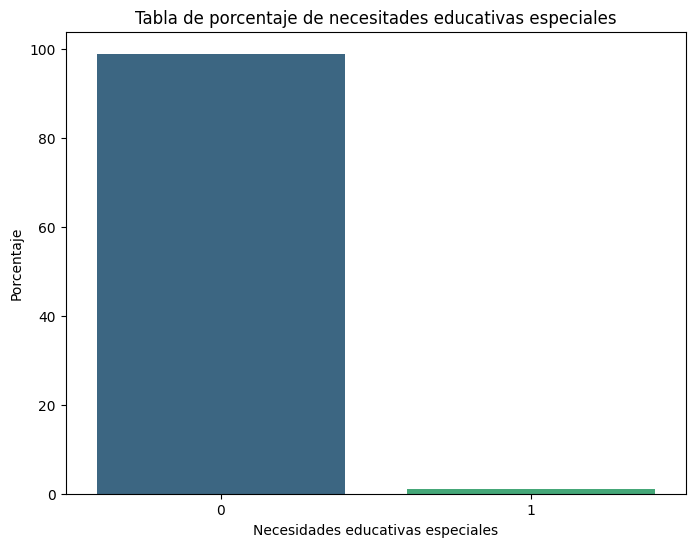

In [ ]:
#14
plt.figure(figsize=(8,6))
sns.countplot(data=datos, x='Educational special needs', stat='percent', palette='viridis')
plt.xlabel('Necesidades educativas especiales')
plt.ylabel('Porcentaje')
plt.title('Tabla de porcentaje de necesitades educativas especiales')
plt.show()

Una conclusión clave de estos resultados es que la gran mayoría, aproximadamente el 98.85%, de los registros en el conjunto de datos no tienen necesidades educativas especiales identificadas, mientras que solo alrededor del 1.15% de los registros indican la presencia de necesidades educativas especiales.

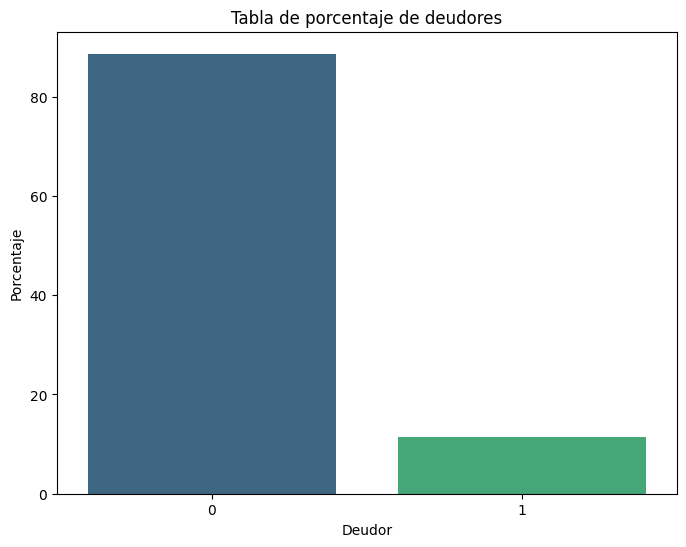

In [ ]:
#15
plt.figure(figsize=(8,6))
sns.countplot(data=datos, x='Debtor', stat='percent', palette='viridis')
plt.xlabel('Deudor')
plt.ylabel('Porcentaje')
plt.title('Tabla de porcentaje de deudores')
plt.show()

Aproximadamente el 11.37% de los registros en el conjunto de datos están clasificados como "Deudores", lo que sugiere que una minoría tiene algún tipo de deuda, mientras que la mayoría, alrededor del 88.63%, no lo está. Este análisis puede ser útil para comprender la proporción de individuos endeudados dentro de la población estudiada y puede informar decisiones financieras, políticas crediticias o estrategias de gestión de riesgos.

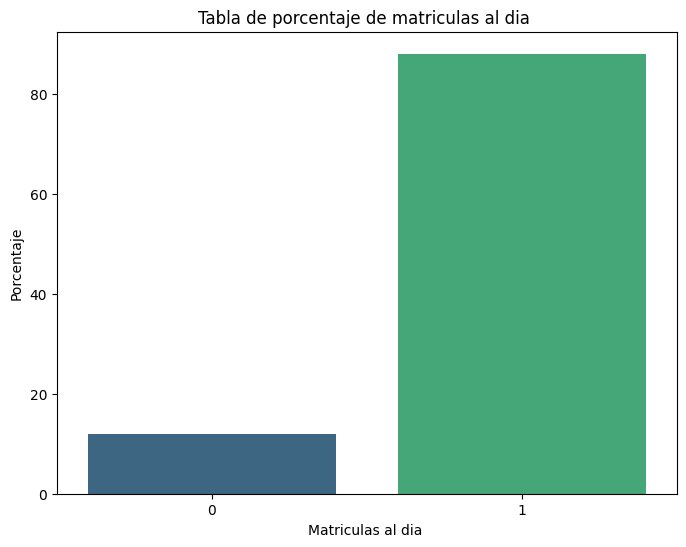

In [ ]:
# 16
plt.figure(figsize=(8,6))
sns.countplot(data=datos, x='Tuition fees up to date', stat='percent', palette='viridis')
plt.xlabel('Matriculas al dia ')
plt.ylabel('Porcentaje')
plt.title('Tabla de porcentaje de matriculas al dia ')
plt.show()

aproximadamente el 88.07% de los registros muestran que las matrículas están al día, lo que sugiere un cumplimiento sólido de las obligaciones financieras relacionadas con la educación. Esto puede reflejar tanto la eficacia del sistema de gestión de matrículas como el compromiso de los individuos con su educación y el mantenimiento de su estatus académico. Sin embargo, es importante abordar y comprender las razones detrás del 11.93% restante de registros donde las matrículas no están al día, lo que podría ofrecer información valiosa para mejorar la accesibilidad y la gestión de la educación.

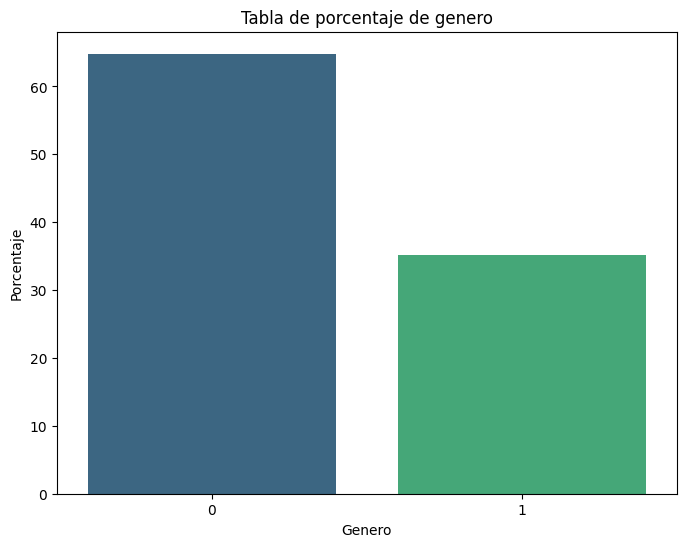

In [ ]:
#17
plt.figure(figsize=(8,6))
sns.countplot(data=datos, x='Gender', stat='percent', palette='viridis')
plt.xlabel('Genero')
plt.ylabel('Porcentaje')
plt.title('Tabla de porcentaje de genero')
plt.show()

los datos muestra que aproximadamente el 64.83% de los registros en el conjunto de datos corresponden al género identificado como 0, mientras que alrededor del 35.17% corresponden al género identificado como 1. Esto sugiere una disparidad en la representación de género en el conjunto de datos, con una predominancia de individuos del género 0 en comparación con el género 1.

Una posible interpretación de estos resultados es que el conjunto de datos está sesgado hacia el género 0, lo que puede indicar una subrepresentación del género 1 en la muestra. Esta disparidad podría tener implicaciones importantes en el análisis subsiguiente, ya que las conclusiones podrían estar sesgadas hacia las características o experiencias del género 0 en lugar de representar equitativamente a ambos géneros.

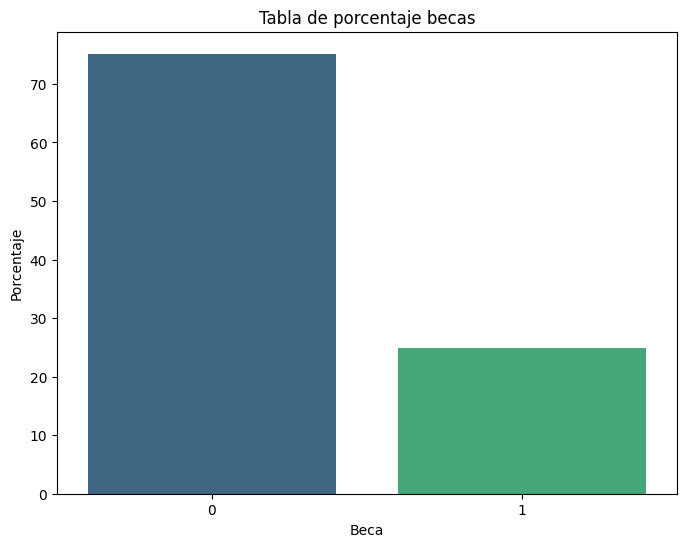

In [ ]:
# 18
plt.figure(figsize=(8,6))
sns.countplot(data=datos, x='Scholarship holder', stat='percent', palette='viridis')
plt.xlabel('Beca')
plt.ylabel('Porcentaje')
plt.title('Tabla de porcentaje becas')
plt.show()

El análisis de los datos muestra que aproximadamente el 75.16% de los registros en el conjunto de datos indican que los individuos no son beneficiarios de becas, mientras que alrededor del 24.84% indican que sí lo son. Esto sugiere que una proporción significativa, pero minoritaria, de los individuos representados en el conjunto de datos reciben algún tipo de beca. La presencia de becas para aproximadamente una cuarta parte de los individuos resalta la importancia de estas ayudas financieras para facilitar el acceso a la educación y promover la equidad educativa.

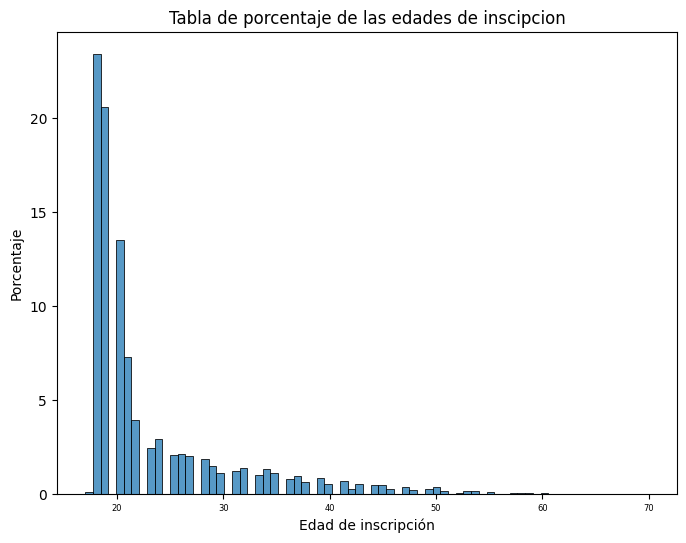

In [ ]:
# 19
plt.figure(figsize=(8,6))
sns.histplot(data=datos, x='Age at enrollment', stat='percent', palette='viridis')
plt.xlabel('Edad de inscripción')
plt.ylabel('Porcentaje')
plt.xticks(fontsize=6)
plt.title('Tabla de porcentaje de las edades de inscipcion')
plt.show()

La distribución de edades de inscripción en el conjunto de datos es variada, con una concentración significativa en edades más jóvenes y una disminución gradual a medida que aumenta la edad. Esto sugiere que la mayoría de los individuos se inscriben en programas educativos a edades más tempranas, pero también hay una presencia notable de inscripciones a edades más avanzadas. Este patrón refleja la diversidad en las trayectorias educativas y destaca la importancia de programas educativos flexibles que atiendan a una amplia gama de grupos de edad.

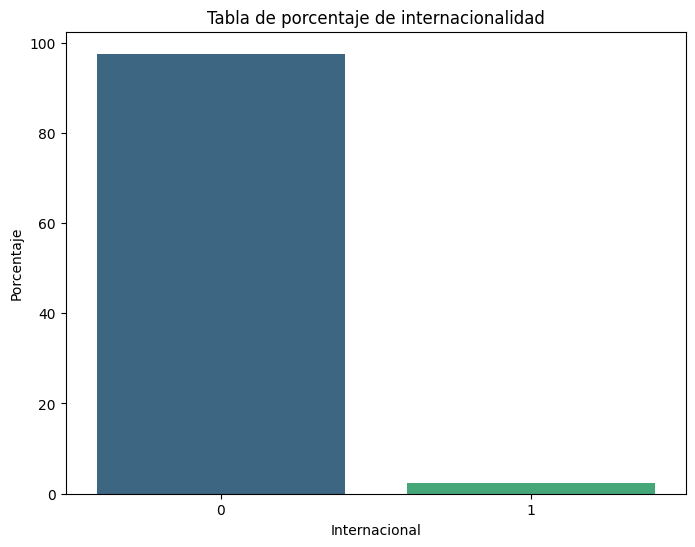

In [ ]:
# 20

plt.figure(figsize=(8,6))
sns.countplot(data=datos, x='International', stat='percent', palette='viridis')
plt.xlabel('Internacional')
plt.ylabel('Porcentaje')
plt.title('Tabla de porcentaje de internacionalidad')
plt.show()

la gran mayoría de los registros en el conjunto de datos (97.51%) corresponden a individuos locales o nacionales, mientras que solo aproximadamente el 2.49% representan individuos con estatus internacional. Esto sugiere que el conjunto de datos está sesgado hacia la población local o nacional, lo que puede tener implicaciones en la representatividad de la muestra y en la generalización de los resultados a nivel internacional.

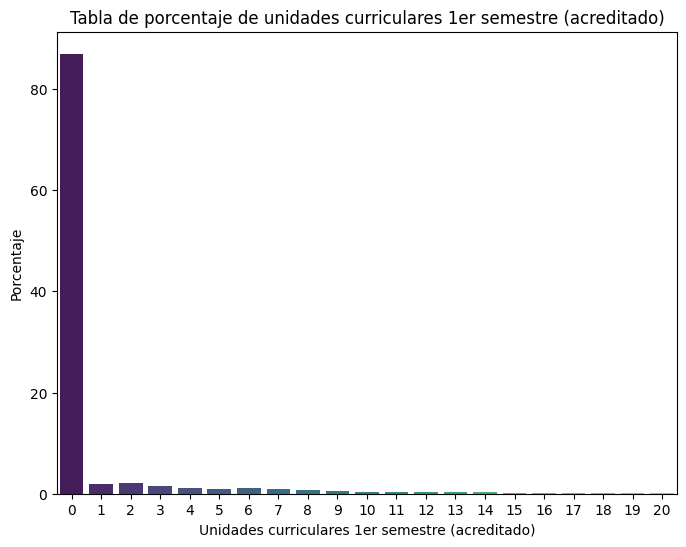

In [ ]:
# 21 Curricular units 1st sem
plt.figure(figsize=(8,6))
sns.countplot(data=datos, x='Curricular units 1st sem (credited)', stat='percent', palette='viridis')
plt.xlabel('Unidades curriculares 1er semestre (acreditado)')
plt.ylabel('Porcentaje')
plt.title('Tabla de porcentaje de unidades curriculares 1er semestre (acreditado)')
plt.show()

El análisis de los datos revela que la gran mayoría de los registros en el conjunto de datos (86.96%) corresponden a individuos que han acreditado 0 unidades curriculares en el primer semestre. Esto podría indicar que una proporción significativa de los estudiantes aún no ha completado ninguna unidad curricular en este periodo.

Además, se observa que hay una distribución variada en la cantidad de unidades curriculares acreditadas, con un pequeño porcentaje de individuos que han acreditado entre 1 y 20 unidades curriculares en el primer semestre. Sin embargo, estos valores representan una proporción considerablemente menor en comparación con aquellos que no han acreditado ninguna unidad curricular.

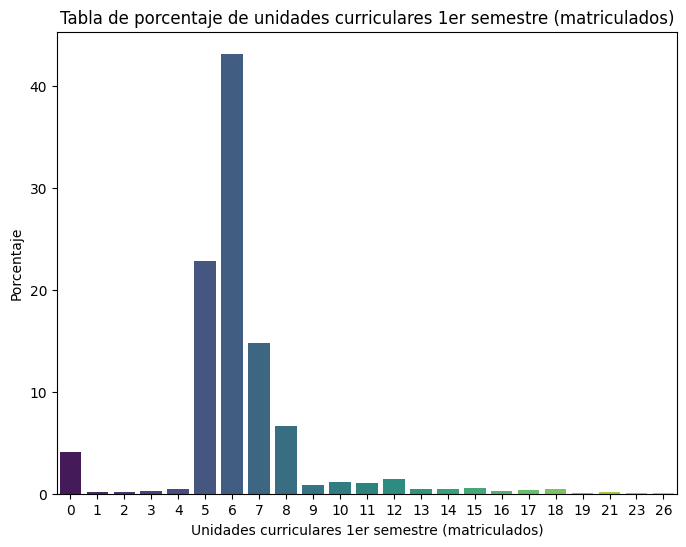

In [ ]:
# 22
plt.figure(figsize=(8,6))
sns.countplot(data=datos, x='Curricular units 1st sem (enrolled)', stat='percent', palette='viridis')
plt.xlabel('Unidades curriculares 1er semestre (matriculados)')
plt.ylabel('Porcentaje')
plt.title('Tabla de porcentaje de unidades curriculares 1er semestre (matriculados)')
plt.show()

El análisis de los datos revela que la distribución de las unidades curriculares matriculadas en el primer semestre es bastante variada. La mayoría de los registros muestran que los estudiantes se matriculan en 6 unidades curriculares (43.17%), seguidos por aquellos que se matriculan en 5 unidades curriculares (22.83%) y 7 unidades curriculares (14.83%). Esto sugiere que una proporción significativa de estudiantes se matricula en un número moderado de unidades curriculares en su primer semestre.

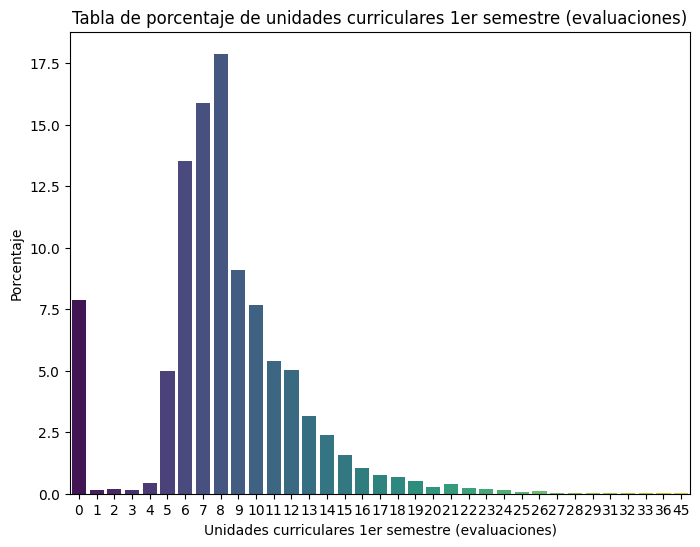

In [ ]:
# 23
plt.figure(figsize=(8,6))
sns.countplot(data=datos, x='Curricular units 1st sem (evaluations)', stat='percent', palette='viridis')
plt.xlabel('Unidades curriculares 1er semestre (evaluaciones)')
plt.ylabel('Porcentaje')
plt.title('Tabla de porcentaje de unidades curriculares 1er semestre (evaluaciones)')
plt.show()

En conclusión, la distribución de evaluaciones de unidades curriculares en el primer semestre muestra una variedad significativa en las cargas académicas de los estudiantes. Si bien la mayoría de los estudiantes tienen entre 6 y 9 evaluaciones, existe una diversidad considerable en la cantidad de evaluaciones, desde aquellos que no tienen ninguna hasta aquellos con más de 15. Esto subraya la importancia de diseñar programas educativos flexibles que puedan adaptarse a las necesidades individuales de los estudiantes y proporcionar el apoyo adecuado para garantizar su éxito académico.

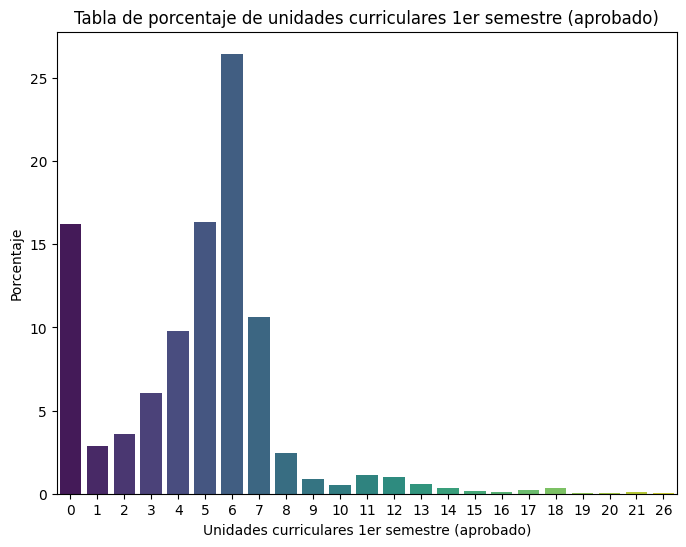

In [ ]:
# 24
plt.figure(figsize=(8,6))
sns.countplot(data=datos, x='Curricular units 1st sem (approved)', stat='percent', palette='viridis')
plt.xlabel('Unidades curriculares 1er semestre (aprobado)')
plt.ylabel('Porcentaje')
plt.title('Tabla de porcentaje de unidades curriculares 1er semestre (aprobado)')
plt.show()

En general, la distribución de unidades curriculares aprobadas en el primer semestre muestra una variabilidad significativa en el desempeño académico de los estudiantes. Aunque la mayoría de los estudiantes aprueban un número moderado de unidades curriculares, existe una amplia gama de resultados, desde aquellos que han aprobado varias unidades hasta aquellos que no han aprobado ninguna. Esto sugiere que el éxito académico en el primer semestre puede estar influenciado por una combinación de factores individuales, académicos y contextuales, destacando la importancia de brindar apoyo y recursos adecuados para garantizar el progreso académico de todos los estudiantes.

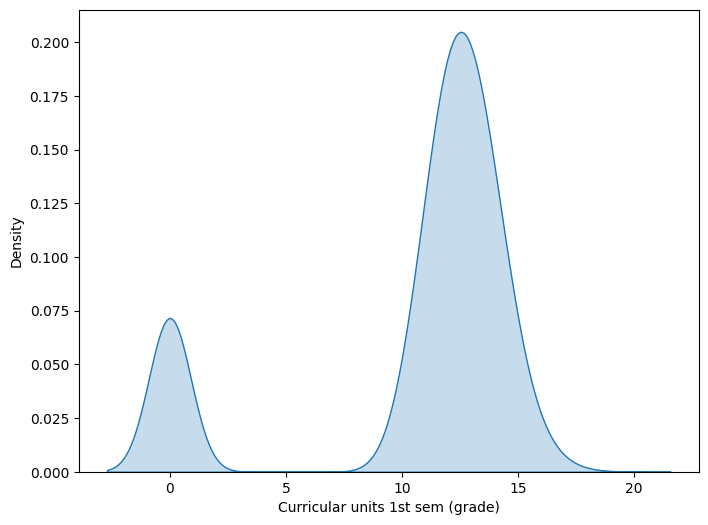

In [ ]:
# 25
plt.figure(figsize=(8,6))
sns.kdeplot(datos['Curricular units 1st sem (grade)'], fill=True)
plt.show()

las estadísticas descriptivas de las calificaciones de las unidades curriculares del primer semestre revelan una distribución de calificaciones con una media de alrededor de 10.64 y una desviación estándar de aproximadamente 4.84. La mayoría de las calificaciones se encuentran dentro de un rango moderado, con el 50% de las observaciones oscilando entre aproximadamente 11 y 13.4. Sin embargo, se observa cierta variabilidad en las calificaciones, con algunos estudiantes obteniendo calificaciones tanto en el extremo superior como en el inferior del espectro.

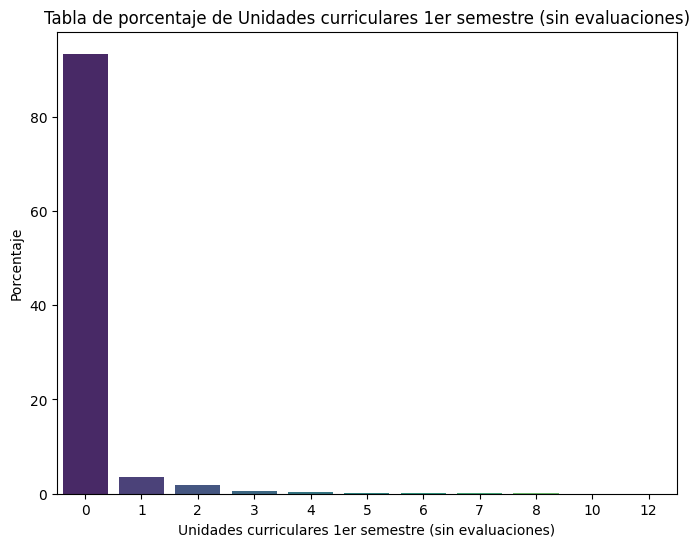

In [ ]:
# 26 Curricular units 1st sem (without evaluations)
plt.figure(figsize=(8,6))
sns.countplot(data=datos, x='Curricular units 1st sem (without evaluations)', stat='percent', palette='viridis')
plt.xlabel('Unidades curriculares 1er semestre (sin evaluaciones)')
plt.ylabel('Porcentaje')
plt.title('Tabla de porcentaje de Unidades curriculares 1er semestre (sin evaluaciones)')
plt.show()

La distribución de unidades curriculares en el primer semestre sin evaluaciones muestra una tendencia clara: la gran mayoría de los registros (aproximadamente el 93.35%) corresponden a estudiantes que no tienen ninguna unidad curricular sin evaluar. Esto sugiere que la mayoría de los estudiantes no dejan unidades curriculares sin evaluar durante su primer semestre.

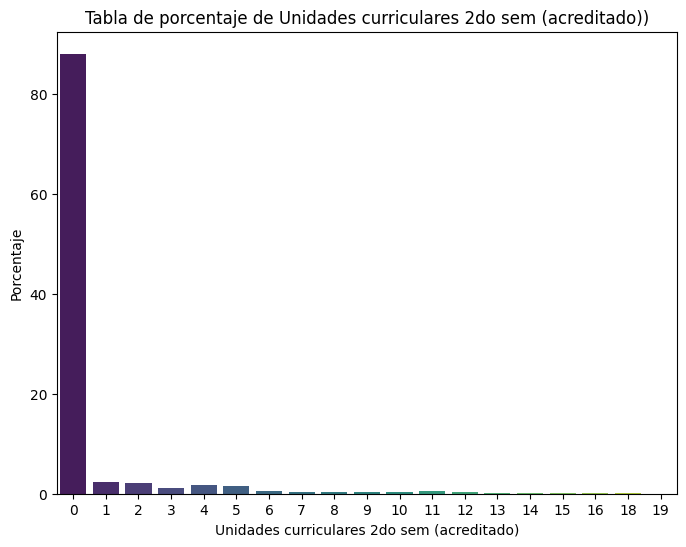

In [ ]:
# 27
plt.figure(figsize=(8,6))
sns.countplot(data=datos, x='Curricular units 2nd sem (credited)', stat='percent', palette='viridis')
plt.xlabel('Unidades curriculares 2do sem (acreditado)')
plt.ylabel('Porcentaje')
plt.title('Tabla de porcentaje de Unidades curriculares 2do sem (acreditado))')
plt.show()

La distribución de unidades curriculares acreditadas en el segundo semestre muestra una tendencia predominante: la gran mayoría de los registros (aproximadamente el 88.02%) corresponden a estudiantes que tienen 0 unidades curriculares acreditadas en ese semestre. Esto indica que la mayoría de los estudiantes no han acreditado ninguna unidad curricular durante el segundo semestre.

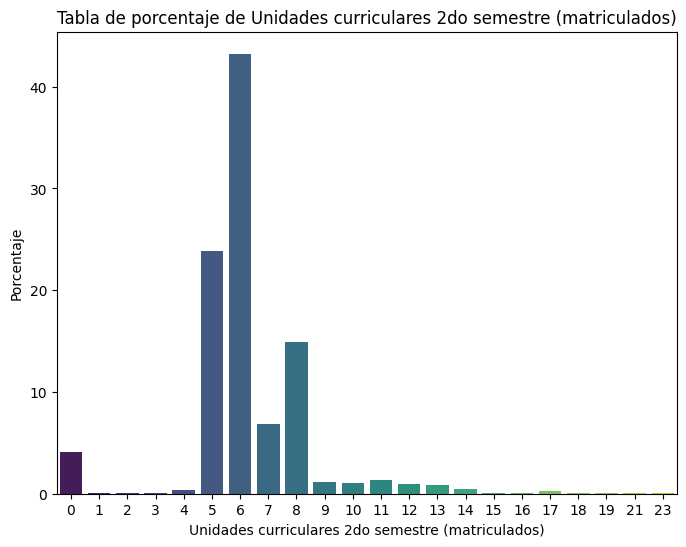

In [ ]:
# 28
plt.figure(figsize=(8,6))
sns.countplot(data=datos, x='Curricular units 2nd sem (enrolled)', stat='percent', palette='viridis')
plt.xlabel('Unidades curriculares 2do semestre (matriculados)')
plt.ylabel('Porcentaje')
plt.title('Tabla de porcentaje de Unidades curriculares 2do semestre (matriculados)')
plt.show()

La distribución de unidades curriculares matriculadas en el segundo semestre muestra una concentración predominante en un número moderado de unidades:

Alrededor del 43.24% de los estudiantes están matriculados en 6 unidades curriculares.
Aproximadamente el 23.82% de los estudiantes están matriculados en 5 unidades curriculares.
Cerca del 14.94% de los estudiantes están matriculados en 8 unidades curriculares.
Hay una disminución gradual en el porcentaje de estudiantes matriculados a medida que aumenta el número de unidades curriculares. Además, hay una presencia de valores atípicos, con un pequeño porcentaje de estudiantes matriculados en más de 8 unidades curriculares.

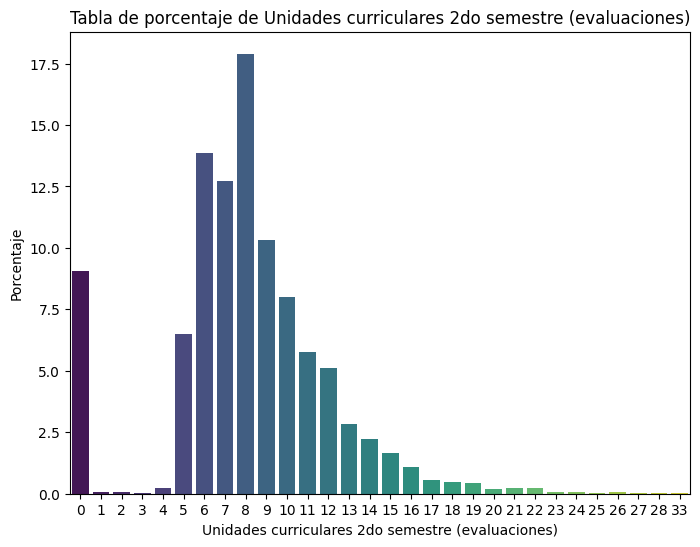

In [ ]:
# 29
plt.figure(figsize=(8,6))
sns.countplot(data=datos, x='Curricular units 2nd sem (evaluations)', stat='percent', palette='viridis')
plt.xlabel('Unidades curriculares 2do semestre (evaluaciones)')
plt.ylabel('Porcentaje')
plt.title('Tabla de porcentaje de Unidades curriculares 2do semestre (evaluaciones)')
plt.show()

La distribución de unidades con evaluaciones en el segundo semestre refleja una diversidad de cargas académicas entre los estudiantes, con la mayoría teniendo un número moderado de unidades evaluadas. Sin embargo, también se observa una presencia significativa de casos con una cantidad baja o alta de unidades evaluadas. Esto sugiere una variedad de enfoques en la distribución de la carga académica durante este período, posiblemente influenciada por diferencias en los planes de estudio, las preferencias estudiantiles y la organización del programa académico.

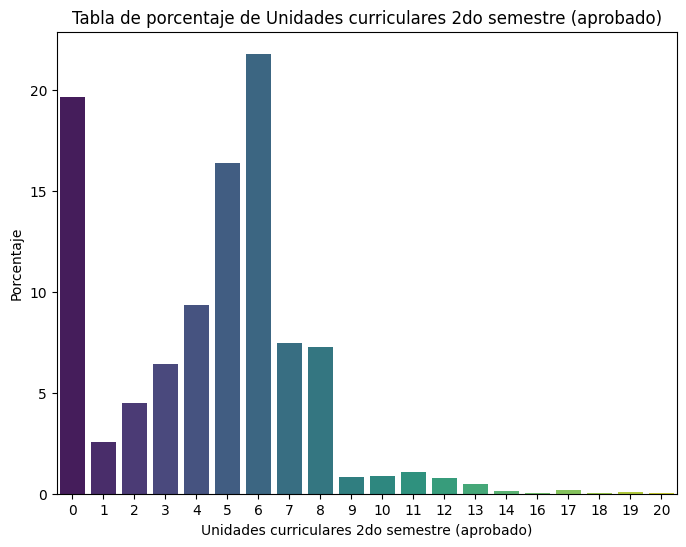

In [ ]:
# 30
plt.figure(figsize=(8,6))
sns.countplot(data=datos, x='Curricular units 2nd sem (approved)', stat='percent', palette='viridis')
plt.xlabel('Unidades curriculares 2do semestre (aprobado)')
plt.ylabel('Porcentaje')
plt.title('Tabla de porcentaje de Unidades curriculares 2do semestre (aprobado)')
plt.show()

La distribución de unidades curriculares aprobadas en el segundo semestre revela que la mayoría de los estudiantes tienen un número moderado de unidades aprobadas:

Alrededor del 21.81% de los estudiantes tienen 6 unidades aprobadas.
Cerca del 19.67% tienen 0 unidades aprobadas, lo que puede indicar que algunos estudiantes aún están en proceso de completar estas unidades.
Un 16.41% de los estudiantes tienen 5 unidades aprobadas, seguidos por el 9.36% con 4 unidades aprobadas y el 7.48% con 7 unidades aprobadas.
Estos datos sugieren que la mayoría de los estudiantes están avanzando satisfactoriamente en sus estudios, pero también puede haber un grupo significativo que necesita completar unidades adicionales en el segundo semestre para avanzar en su programa académico.

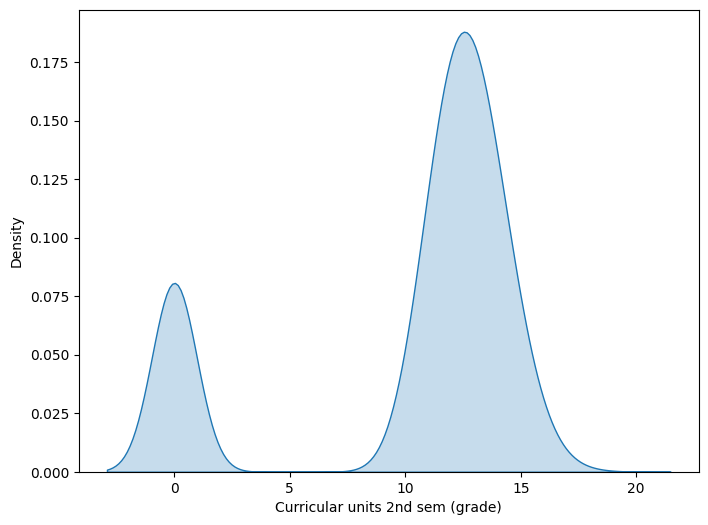

In [ ]:
# 31
plt.figure(figsize=(8,6))
sns.kdeplot(datos['Curricular units 2nd sem (grade)'], fill=True)
plt.show()


las estadísticas descriptivas de las calificaciones de las unidades curriculares del segundo semestre muestran una distribución con una media de aproximadamente 10.23 y una desviación estándar de alrededor de 5.21. La mayoría de las calificaciones se encuentran dentro de un rango intercuartil relativamente estrecho, con el 50% de las observaciones oscilando entre 10.75 y 13.33. Sin embargo, se observa una variabilidad considerable en las calificaciones, con valores que van desde 0 hasta 18.57. Esto sugiere que si bien la mayoría de los estudiantes obtienen calificaciones dentro de un rango moderado, existen algunas observaciones con calificaciones extremas tanto en el extremo superior como en el inferior del espectro.

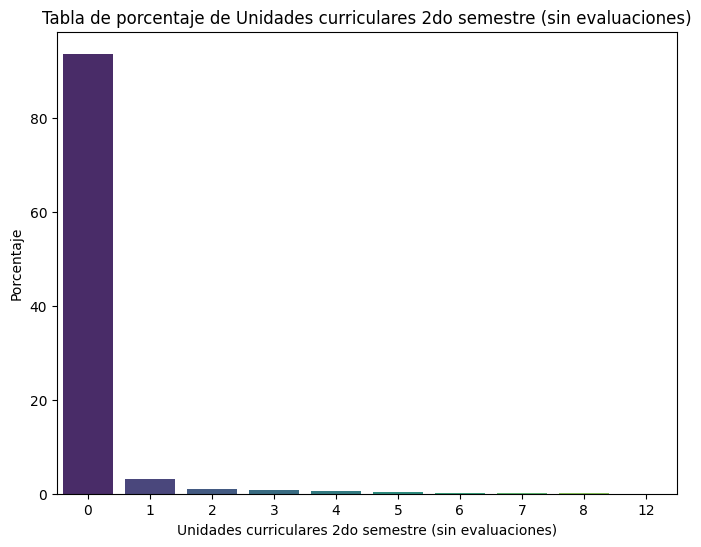

In [ ]:
# 32
plt.figure(figsize=(8,6))
sns.countplot(data=datos, x='Curricular units 2nd sem (without evaluations)', stat='percent', palette='viridis')
plt.xlabel('Unidades curriculares 2do semestre (sin evaluaciones)')
plt.ylabel('Porcentaje')
plt.title('Tabla de porcentaje de Unidades curriculares 2do semestre (sin evaluaciones)')
plt.show()

La distribución de unidades curriculares en el primer semestre sin evaluaciones muestra una tendencia clara: la gran mayoría de los registros (aproximadamente el 93.35%) corresponden a estudiantes que no tienen ninguna unidad curricular sin evaluar. Esto sugiere que la mayoría de los estudiantes no dejan unidades curriculares sin evaluar durante su primer semestre.

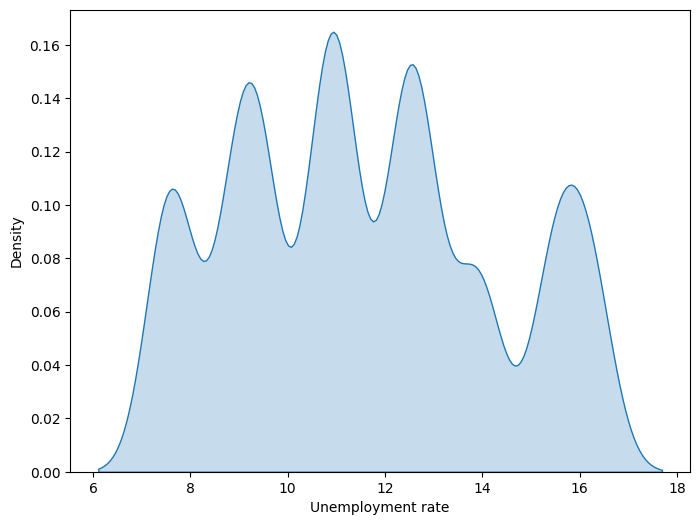

In [ ]:
# 33
plt.figure(figsize=(8,6))
sns.kdeplot(datos['Unemployment rate'], fill=True)
plt.show()

En general, las estadísticas descriptivas de la tasa de desempleo muestran que existe una variabilidad en las tasas de desempleo registradas en los datos, con una media del 11.57%. Esto indica que, en promedio, alrededor del 11.57% de la población está desempleada en el conjunto de datos. Sin embargo, hay una dispersión significativa alrededor de esta media, con desviaciones estándar de aproximadamente 2.66 puntos porcentuales. Las tasas de desempleo oscilan entre un mínimo del 7.6% y un máximo del 16.2%, con la mayoría de las observaciones concentradas entre el 9.4% y el 13.9%. Esto sugiere que, aunque la tasa de desempleo promedio es moderada, hay regiones o períodos de tiempo específicos que pueden experimentar niveles más altos o más bajos de desempleo.

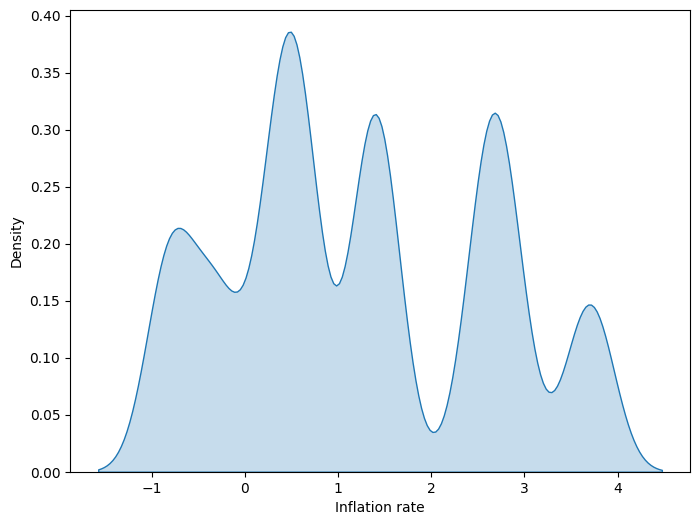

In [ ]:
# 34
plt.figure(figsize=(8,6))
sns.kdeplot(datos['Inflation rate'], fill=True)
plt.show()

las estadísticas descriptivas muestran que la tasa de inflación en los datos tiene una media de alrededor del 1.23%. Sin embargo, existe una variabilidad considerable en las tasas registradas, con una desviación estándar de aproximadamente 1.38 puntos porcentuales. Las observaciones van desde la deflación hasta una tasa máxima del 3.7%. La mediana de 1.4% indica que la mitad de las observaciones tienen una tasa de inflación por debajo de este valor. Esto sugiere que, aunque la inflación en general es moderada, hay una amplia gama de variabilidad en las tasas de inflación observadas.

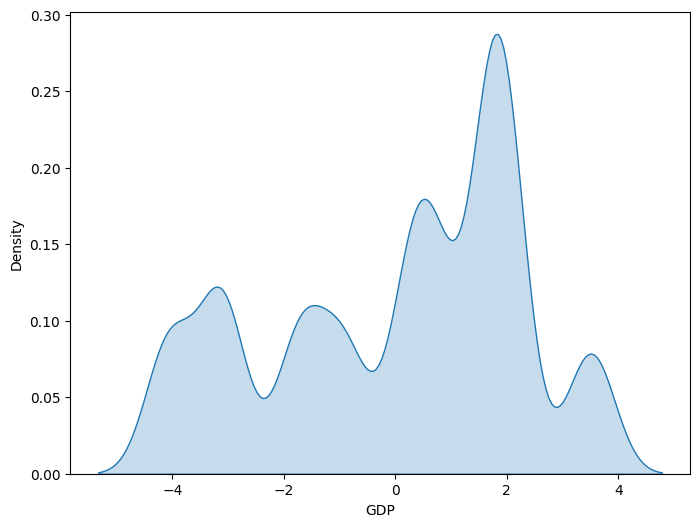

In [ ]:
# 35
plt.figure(figsize=(8,6))
sns.kdeplot(datos['GDP'], fill=True)
plt.show()

las estadísticas descriptivas del Producto Interno Bruto (PIB) muestran una distribución con una media cercana a cero y una desviación estándar de aproximadamente 2.27. La mediana de 0.32 indica que la mitad de las observaciones tienen un PIB por encima de este valor. Aunque las observaciones van desde valores negativos hasta un máximo de 3.51, la mayoría de los datos se encuentran dentro de un rango de -1.7 a 1.79. Esto sugiere que, en general, el PIB tiende a fluctuar alrededor de cero, con la mayoría de las observaciones concentradas en valores relativamente bajos.

## Analisis de relación de variables continuas



<Figure size 5000x5000 with 0 Axes>

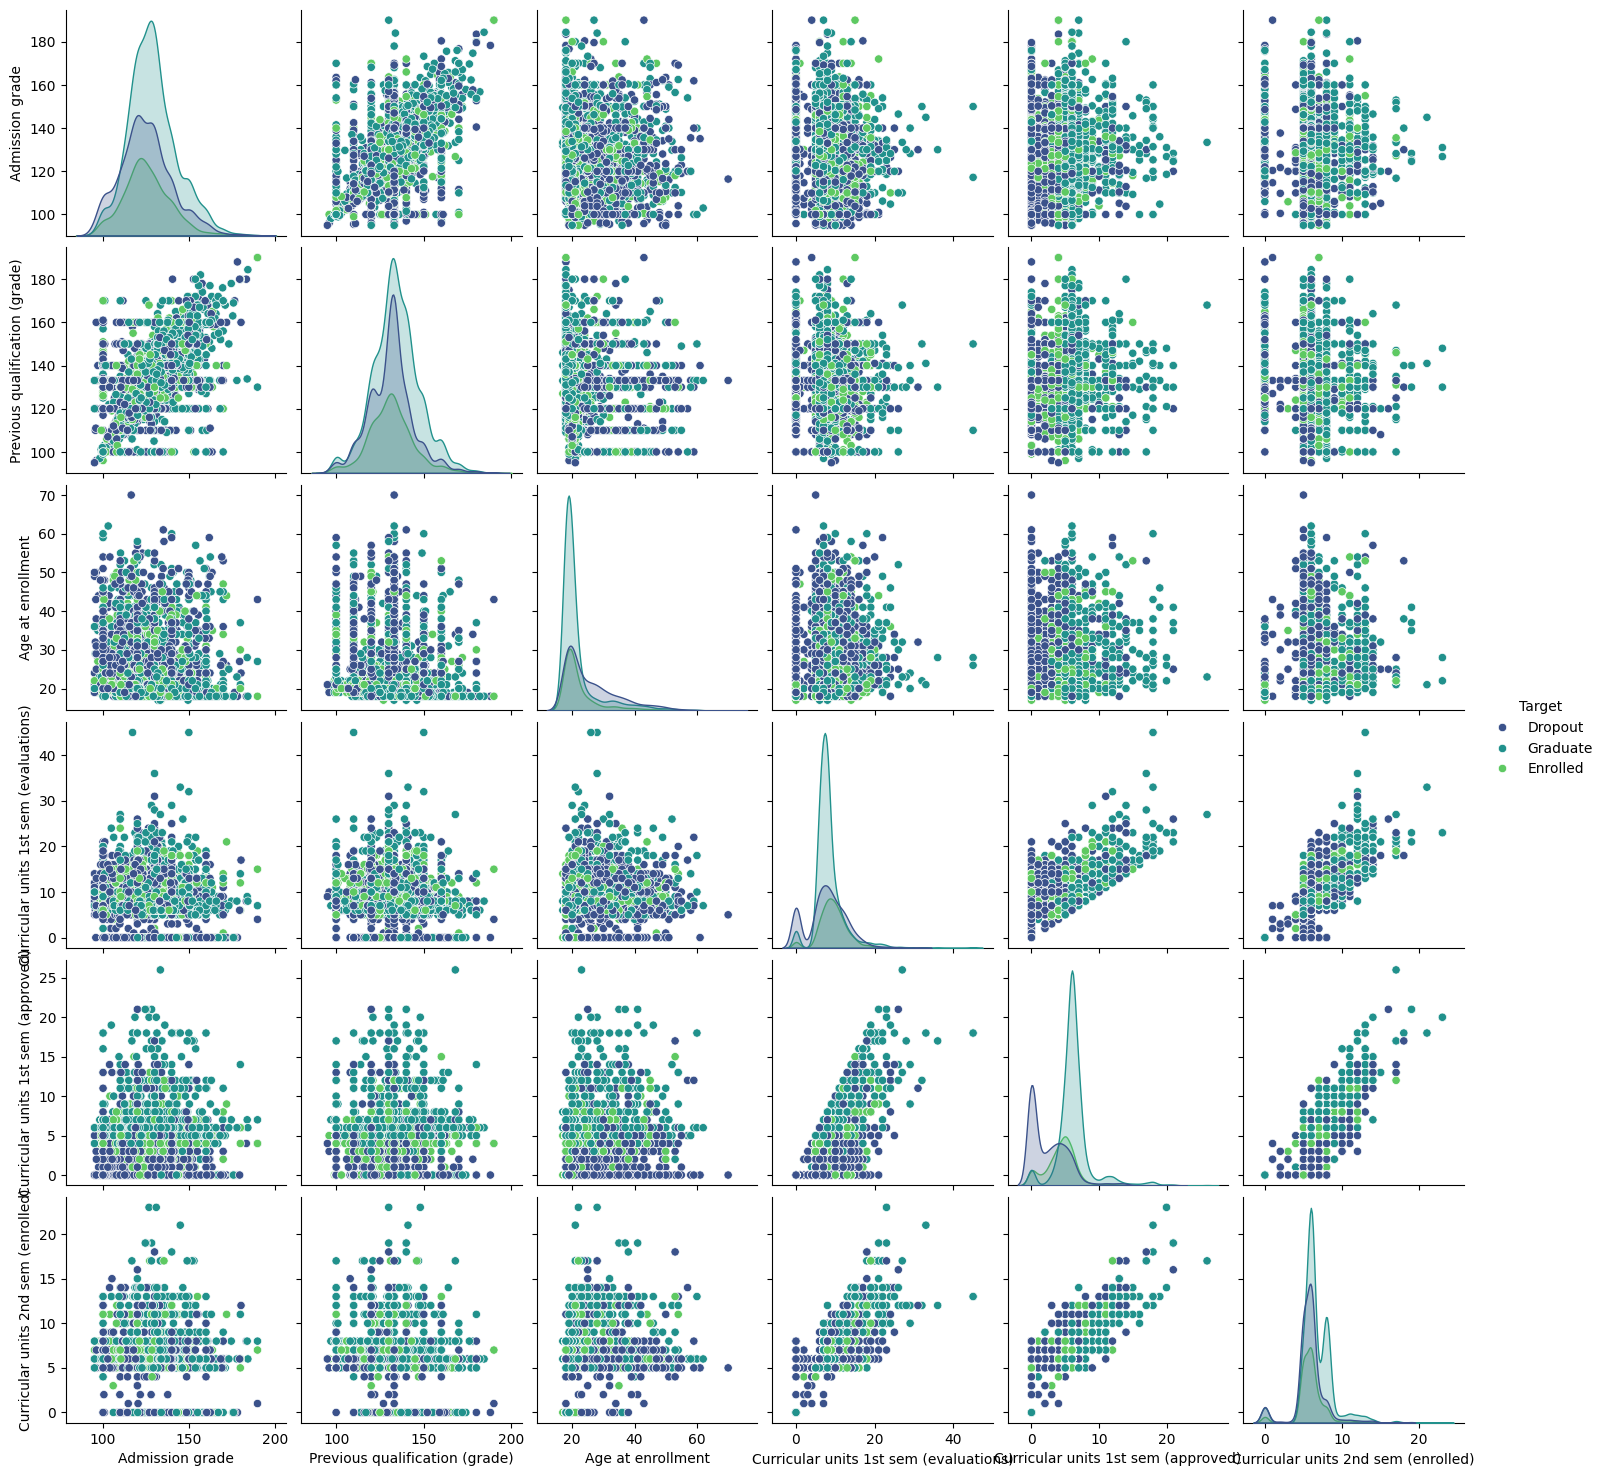

In [ ]:
variables_continuas = ['Admission grade','Previous qualification (grade)',
                       'Age at enrollment',
                      'Curricular units 1st sem (evaluations)','Curricular units 1st sem (approved)',
                      'Curricular units 2nd sem (enrolled)'
                  ]

plt.figure(figsize=(50,50))
sns.pairplot(data=datos, vars=variables_continuas, hue='Target', palette='viridis')
plt.xticks(rotation=49)
plt.show()


Análisis de matriz de dispersión

1. Las personas que desertaron presentaban notas mucho más inferiores a los que fueron clasificados como graduados

2. Las personas que desertaron aprobaron menos materias que las que se graduaron

3. La cantidad de materias matriculas en el segundo semestre tiene relación con la cantidad de evaluaciones y materias aprobadas

4. la nota de admisión tiene correlación con la nota de cualificación previa

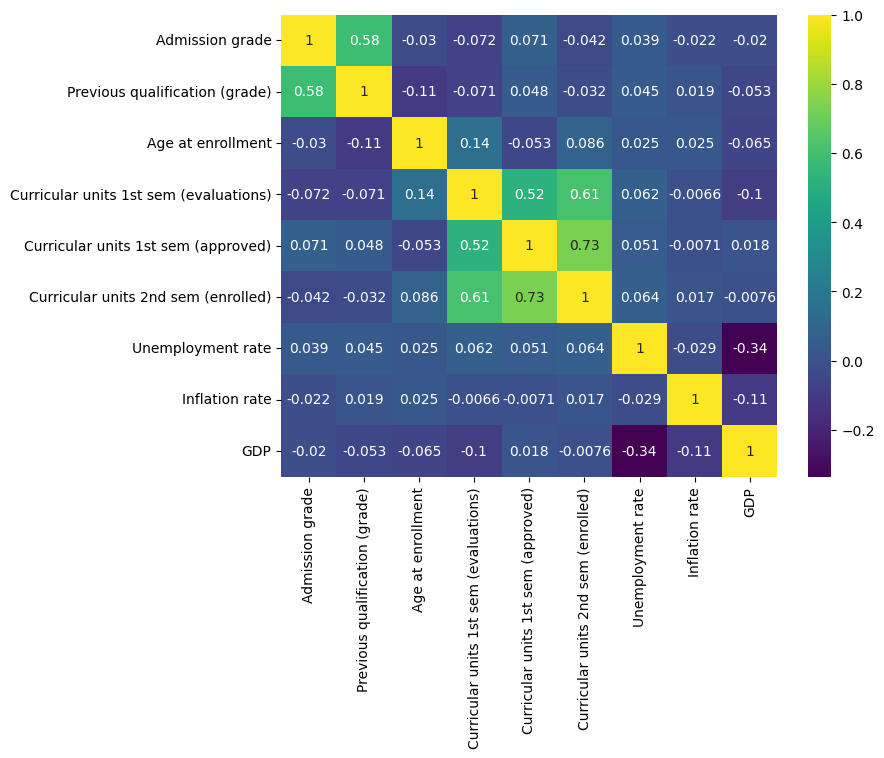

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(datos[variables_continuas].corr(), cbar=True, annot=True, cmap='viridis')
plt.show()

#Analisis relación variables Categóricas-Categóricas
Usando como métrica la V de Cramer

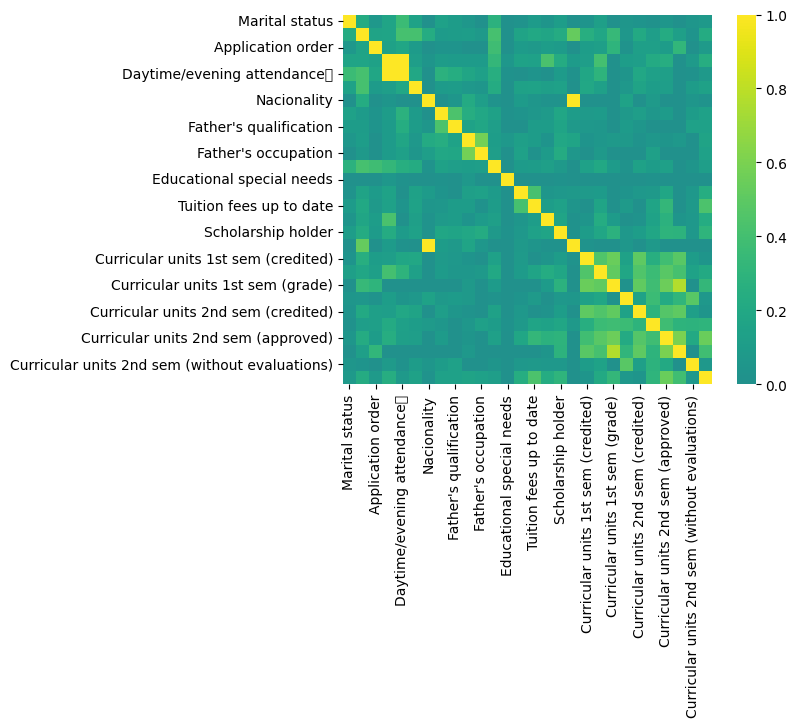

In [ ]:
variables_nominales = [col for col in datos.columns if col not in variables_continuas]
result = associations(datos[variables_nominales], nominal_columns=variables_nominales,nom_nom_assoc='cramer', annot=False, cmap='viridis')

# Correlación general
Las variables catégoricas-catégoricas fueron análizadas con

In [29]:
variables_continuas = ['Admission grade','Previous qualification (grade)',
                      'Age at enrollment',
                      'Curricular units 1st sem (credited)',
                      'Curricular units 1st sem (enrolled)',
                      'Curricular units 1st sem (evaluations)',
                      'Curricular units 1st sem (approved)',
                      'Curricular units 1st sem (grade)',
                      'Curricular units 1st sem (without evaluations)',
                      'Curricular units 2nd sem (credited)',
                      'Curricular units 2nd sem (enrolled)',
                      'Curricular units 2nd sem (evaluations)',
                      'Curricular units 2nd sem (approved)',
                      'Curricular units 2nd sem (grade)',
                      'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
                      'Inflation rate', 'GDP']

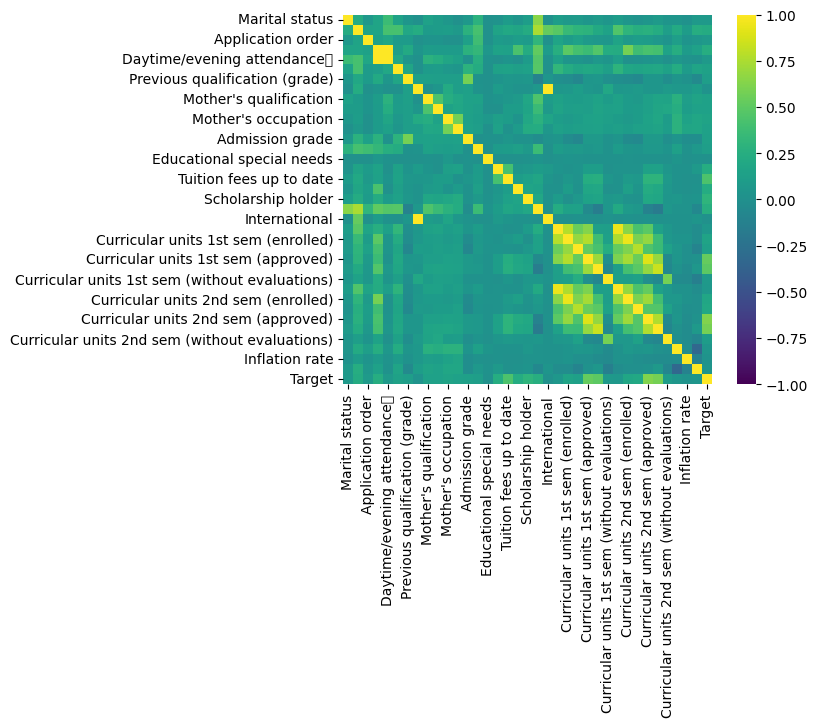

In [ ]:
variables_nominales = [col for col in datos.columns if col not in variables_continuas]
result = associations(datos, nominal_columns=variables_nominales,numerical_columns=variables_continuas, annot=False, cmap='viridis')

# Transformaciones de variables

## Codificación de las variables categóricas
Usaremos el método de codificación One Hot Encoding para las variables catégoricas que tengan más de dos catégorias



In [28]:
variables_codificar = ['Marital status', 'Application mode', 'Application order', 'Course',
                       'Previous qualification','Nacionality','''Mother's qualification''', '''Father's qualification''',
                      '''Mother's occupation''', '''Father's occupation''']

encoder = OneHotEncoder(sparse=False)

# Ajustar y transformar las columnas categóricas
encoded_data = encoder.fit_transform(datos[variables_codificar])

# Crear un DataFrame con las columnas codificadas
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(variables_codificar))

# Concatenar el DataFrame original con el DataFrame codificado
final_df = pd.concat([datos, encoded_df], axis=1)

#Eliminamos las columnas ya co
final_df = final_df.drop(columns=variables_codificar)

#Escalamientos de variables númericas
Elimina la media, media = 0, y varianza = 1, se hace esto para obtener mejor rendimiento en los modelos, se debe tener cuidado en la interpretación de los resultados obtenidos

In [39]:
# Crea un objeto StandardScaler
scaler = StandardScaler()

# Ajusta el scaler a las columnas seleccionadas y luego transforma las columnas
columnas_escaladas = scaler.fit_transform(final_df[variables_continuas])

# Reemplaza las columnas originales con las columnas escaladas
final_df[variables_continuas] = columnas_escaladas

In [40]:
final_df.to_csv('clasificacion_preprocesado.csv',index=False)

# Conclusiones

* La calificación de admisión (Admission grade) tiene una correlación moderada positiva con la calificación previa (Previous qualification grade).

* La edad al momento de la inscripción (Age at enrollment) tiene correlaciones débiles con las otras variables.

* El número de unidades curriculares inscritas en el primer semestre (Curricular units 1st sem evaluations) tiene una correlación moderada positiva con el número de unidades curriculares aprobadas en el primer semestre (Curricular units 1st sem approved), así como con el número de unidades curriculares inscritas en el segundo semestre (Curricular units 2nd sem enrolled).

* El número de unidades curriculares aprobadas en el primer semestre (Curricular units 1st sem approved) tiene una correlación fuerte positiva con el número de unidades curriculares inscritas en el segundo semestre (Curricular units 2nd sem enrolled).

* Variables como unidades curriculares del primer semestre y del segundo semestre, contando la nota, aprobados y acreditados, estan fuertemente asociados entre ellos basandonos en el estadistico V de cramer

* La variable nacionalidad esta bastante relacionada con la internacional, se puede decir que aportan la misma información

* El indice de desempleo esta fuertemente relacionado con el indice de inflación